# 공공데이터 분석 연습2
https://www.data.go.kr/data/15007115/fileData.do

# 가설
- 정형외과 진료횟수가 성별과 관련이 있을까?
- 나이와 정형외과 진료횟수에 상관관계가 있을까?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os

if os.name == "posix":
    plt.rc("font", family="AppleGothic")
else :
    plt.rc("font", family="Malgun Gothic")
# 마이너스 폰트 깨지는 문제 해결
plt.rc("axes", unicode_minus=False)

In [3]:
df = pd.read_csv("T20_2019_1백만.1.csv", encoding="cp949")
df.shape

(4624144, 19)

In [4]:
df.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
0,2019,1,104243474,2,12,46,20191104,3,5,M751,M750,1,1,0.25,19240,9600,9640,0,20201222
1,2019,1,107479370,2,12,46,20190806,3,1,E1164,N308,1,1,0.25,145680,72800,72880,0,20201222
2,2019,1,106881883,2,12,46,20190920,3,1,N308,E1164,1,1,0.25,13240,6600,6640,3,20201222
3,2019,1,109043837,2,12,46,20190807,2,1,E1164,N308,7,21,0.25,861590,205810,655780,0,20201222
4,2019,1,103174392,2,12,46,20190318,3,13,H6531,J303,1,1,0.15,48440,14500,33940,3,20201222


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4624144 entries, 0 to 4624143
Data columns (total 19 columns):
 #   Column      Dtype  
---  ------      -----  
 0   기준년도        int64  
 1   가입자 일련번호    int64  
 2   진료내역일련번호    int64  
 3   성별코드        int64  
 4   연령대코드       int64  
 5   시도코드        int64  
 6   요양개시일자      int64  
 7   서식코드        int64  
 8   진료과목코드      int64  
 9   주상병코드       object 
 10  부상병코드       object 
 11  요양일수        int64  
 12  입내원일수       int64  
 13  심결가산율       float64
 14  심결요양급여비용총액  int64  
 15  심결본인부담금     int64  
 16  심결보험자부담금    int64  
 17  총처방일수       int64  
 18  데이터 기준일자    int64  
dtypes: float64(1), int64(16), object(2)
memory usage: 670.3+ MB


In [6]:
df.columns

Index(['기준년도', '가입자 일련번호', '진료내역일련번호', '성별코드', '연령대코드', '시도코드', '요양개시일자',
       '서식코드', '진료과목코드', '주상병코드', '부상병코드', '요양일수', '입내원일수', '심결가산율',
       '심결요양급여비용총액', '심결본인부담금', '심결보험자부담금', '총처방일수', '데이터 기준일자'],
      dtype='object')

In [7]:
df.dtypes

기준년도            int64
가입자 일련번호        int64
진료내역일련번호        int64
성별코드            int64
연령대코드           int64
시도코드            int64
요양개시일자          int64
서식코드            int64
진료과목코드          int64
주상병코드          object
부상병코드          object
요양일수            int64
입내원일수           int64
심결가산율         float64
심결요양급여비용총액      int64
심결본인부담금         int64
심결보험자부담금        int64
총처방일수           int64
데이터 기준일자        int64
dtype: object

In [8]:
df.isnull().sum()

기준년도          0
가입자 일련번호      0
진료내역일련번호      0
성별코드          0
연령대코드         0
시도코드          0
요양개시일자        0
서식코드          0
진료과목코드        0
주상병코드         0
부상병코드         0
요양일수          0
입내원일수         0
심결가산율         0
심결요양급여비용총액    0
심결본인부담금       0
심결보험자부담금      0
총처방일수         0
데이터 기준일자      0
dtype: int64

In [9]:
df[["요양일수", "입내원일수"]].head()

,요양일수,입내원일수
0,1,1
1,1,1
2,1,1
3,7,21
4,1,1


In [10]:
df[["요양일수", "입내원일수"]].describe()

,요양일수,입내원일수
count,4.624144e+06,4.624144e+06
mean,1.200685e+00,1.873727e+00
std,2.128052e+00,5.559391e+00
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00
75%,1.000000e+00,1.000000e+00
max,1.960000e+02,6.900000e+02


In [11]:
df["성별코드"].value_counts()

2    2606133
1    2018011
Name: 성별코드, dtype: int64

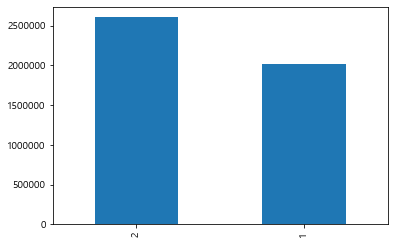

In [12]:
df["성별코드"].value_counts().plot.bar()

In [13]:
orthopedics_type = df["진료과목코드"] == 5  # 정형외과 진료
df.loc[orthopedics_type, "진료과목코드"].value_counts()

5    754344
Name: 진료과목코드, dtype: int64

In [14]:
df.groupby(["성별코드"]).count()

,기준년도,가입자 일련번호,진료내역일련번호,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
성별코드,,,,,,,,,,,,,,,,,,
1,2018011,2018011,2018011,2018011,2018011,2018011,2018011,2018011,2018011,2018011,2018011,2018011,2018011,2018011,2018011,2018011,2018011,2018011
2,2606133,2606133,2606133,2606133,2606133,2606133,2606133,2606133,2606133,2606133,2606133,2606133,2606133,2606133,2606133,2606133,2606133,2606133


In [15]:
df.groupby(["성별코드", orthopedics_type])["가입자 일련번호"].count()

성별코드  진료과목코드
1     False     1710727
      True       307284
2     False     2159073
      True       447060
Name: 가입자 일련번호, dtype: int64

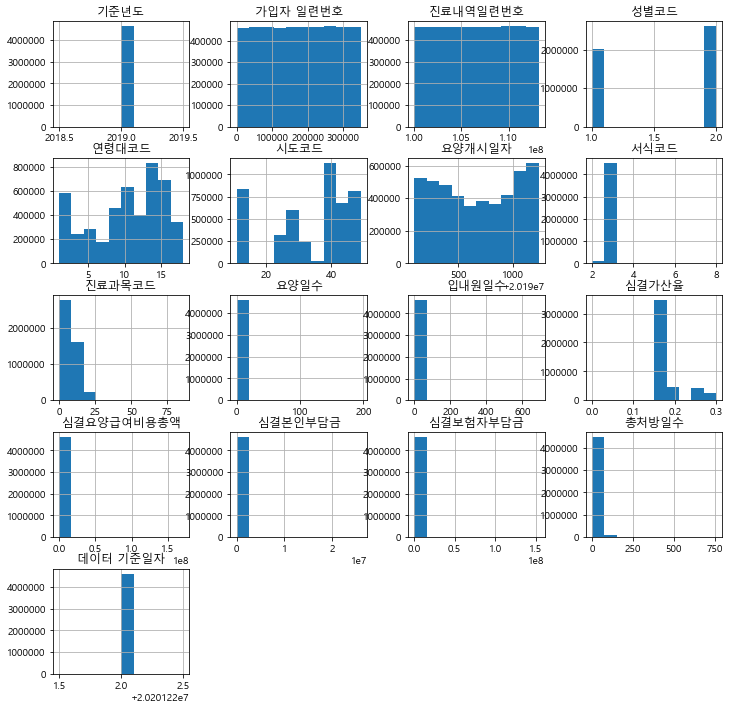

In [16]:
h = df.hist(figsize=(12, 12))

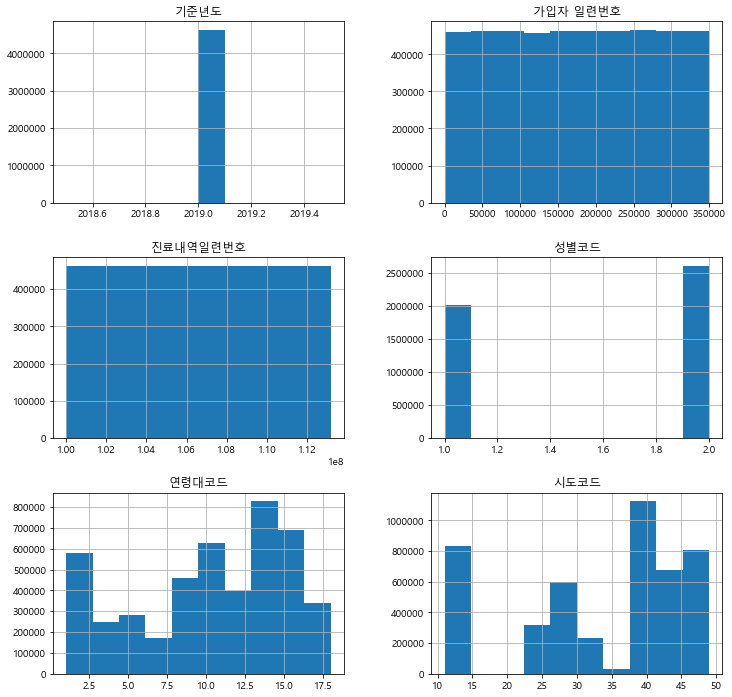

In [17]:
h = df.iloc[:, :6].hist(figsize=(12, 12))

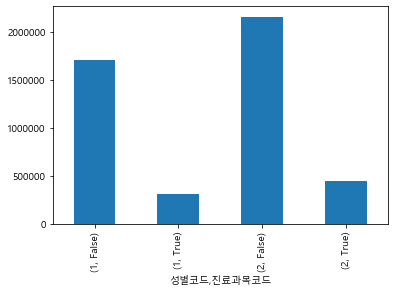

In [18]:
df.groupby(["성별코드", orthopedics_type])["가입자 일련번호"].count().plot.bar()

In [19]:
orthopedics = df[df["진료과목코드"] == 5]
orthopedics

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
0,2019,1,104243474,2,12,46,20191104,3,5,M751,M750,1,1,0.25,19240,9600,9640,0,20201222
5,2019,1,104243492,2,12,46,20191106,3,5,M751,M750,1,1,0.25,27890,13900,13990,7,20201222
6,2019,1,104243480,2,12,46,20191114,3,5,M751,M750,1,1,0.25,12330,6100,6230,0,20201222
7,2019,1,104243484,2,12,46,20191107,3,5,M751,M750,1,1,0.25,12330,6100,6230,0,20201222
8,2019,1,103488853,2,12,46,20191227,3,5,M751,M750,1,1,0.25,21890,10900,10990,0,20201222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624127,2019,349998,109899758,2,11,11,20190722,3,5,S134,M501,1,1,0.15,9770,2900,6870,0,20201222
4624128,2019,349998,109899760,2,11,11,20190710,3,5,S134,M501,1,1,0.15,9770,2900,6870,0,20201222
4624132,2019,349998,109899757,2,11,11,20190716,3,5,S134,M501,1,1,0.15,9770,2900,6870,0,20201222
4624135,2019,349999,100946991,2,9,41,20190329,3,5,S434,S637,1,1,0.20,54230,21600,32630,5,20201222


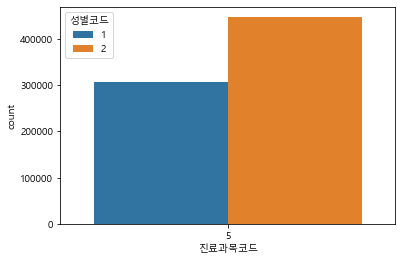

In [20]:
sns.countplot(data=orthopedics, x="진료과목코드", hue="성별코드")

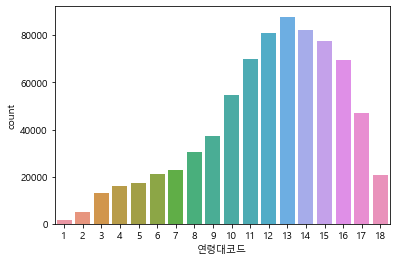

In [21]:
sns.countplot(data=orthopedics, x="연령대코드")

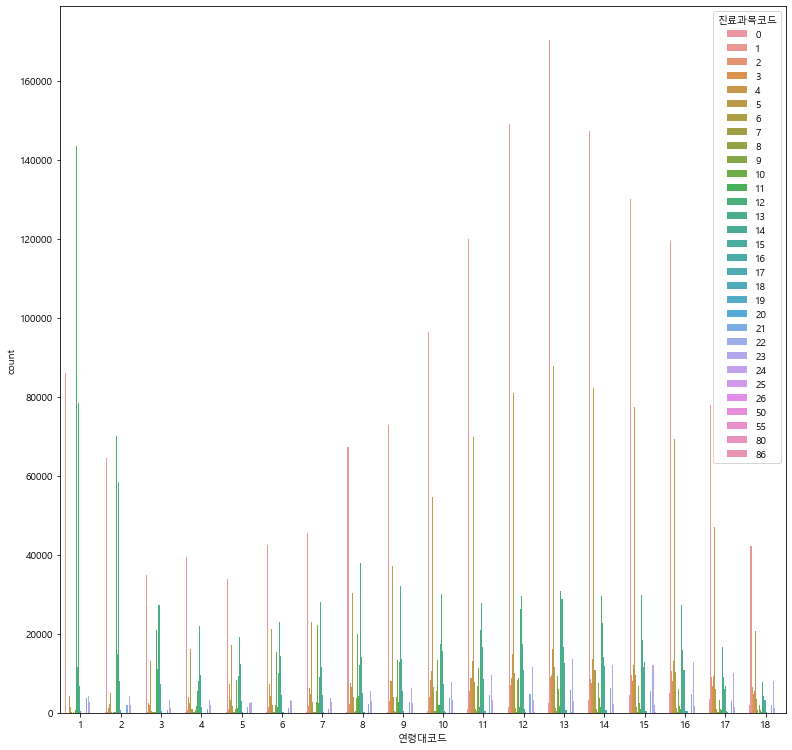

In [22]:
plt.figure(figsize=(13, 13))
sns.countplot(data=df, x="연령대코드", hue="진료과목코드")

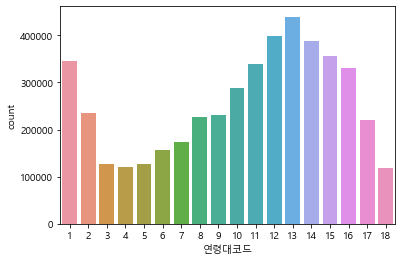

In [23]:
sns.countplot(data=df, x="연령대코드")

In [24]:
child = df[(df["연령대코드"] == 0) | (df["연령대코드"] == 1)]
child

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
253,2019,20,112704847,2,1,27,20190416,3,5,S42440,S42450,1,1,0.15,26000,5400,20600,0,20201222
254,2019,20,108365268,2,1,27,20190824,3,1,K121,B009,1,1,0.15,14240,2900,11340,2,20201222
255,2019,20,112534544,2,1,27,20190430,3,13,J209,J303,1,1,0.15,16500,3400,13100,3,20201222
256,2019,20,102561116,2,1,27,20190106,3,11,J0390,J209,1,1,0.20,19950,5500,14450,3,20201222
257,2019,20,111541127,2,1,27,20190628,3,1,T784,L282,1,1,0.15,16600,3400,13200,1,20201222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4623707,2019,349965,110247486,1,1,42,20190624,3,23,J209,J00,1,3,0.20,22130,5400,16730,0,20201222
4623708,2019,349965,107298827,1,1,42,20190918,3,23,J00,R509,1,3,0.20,16670,4000,12670,0,20201222
4623709,2019,349965,100112176,1,1,42,20190102,3,11,J00,J040,1,2,0.20,15050,3600,11450,0,20201222
4623710,2019,349965,103347838,1,1,42,20191222,3,23,J_,R509,1,5,0.20,33350,8100,25250,0,20201222


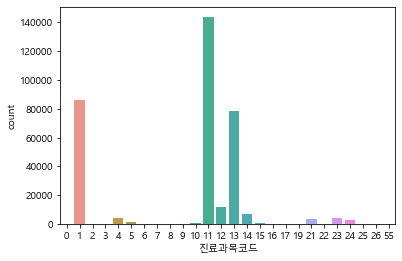

In [25]:
# 진료과목코드 1은 내과, 11은 소아청소년과, 13은 이비인후과
sns.countplot(data=child, x="진료과목코드")